# 머신러닝 개요

- 선형 모델 설명

## 머신러닝 정의
- 수치를 예측하는 회귀, 카테고리를 예측하는 분류, 최적의 추천 등을 수행하는 소프트웨어로, 데이터를 보고 학습하여 점차 성능이 개선된다
- 현재 인공지능을 구현하는 대표적인 방법이 머신러닝 기법이다
 - 인공지능을 구현하는 다른 방법으로 "생각하는" 컴퓨터를 만들거나, 언어를 문법적으로 이해하는 컴퓨터를 만드는 것, 또는 사람의 지식을 알고리즘이나 데이터로 구축하는 방법은 성공하지 못했다
 

- 머신러닝 동작
<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.08.38.png?raw=1" align='left'>

### 데이터 (X)
- 훈련 (train) 데이터: 모델을 학습시키는데 사용하는 데이터
- 검증 (validation) 데이터: 학습시킨 모델의 동작을 검증하는데 사용하는 데이터
- 학습에 사용하는 데이터가 많을수록 예측, 추천 성능이 향상된다
 - 데이터 타입: 정형 데이터(테이블 데이터), 비정형 데이터(이미지, 텍스트, 센서 데이터 등)
- 머신러닝 모델의 성능을 높이기 위해서는 원시(raw) 데이터로부터 적절한 학습 및 검증 데이터를 만드는 **데이터 전처리**가 반드시 필요하다

### 머신러닝 모델
- 입력 데이터(X)로부터 최적의 출력(y)을 얻는 소프트웨어
- 최적의 출력이란 정답(label, target)을 잘 예측하는 것을 말한다
 - 최적의 출력을 얻기 위해서 모델을 구성하는 파라미터의 최적치를 찾는다(예: 선형 회귀에서 가중치 값)
- 모델의 종류: 선형모델, 로지스틱 회귀, SVM, 결정트리, 랜덤 포레스트, kNN, 베이시언, 딥러닝 모델 (MLP, CNN, RNN 등)

### 목적
- 머신러닝의 목적은 다음 중 하나이다
 - 예측(predictive) 분석
> 회귀 예측(regression): 수치를 예측  
> 분류 예측(classification): 카테고리를 예측
 - 설명(descriptive)적 분석
 - 군집화(clustering)
 - 추천(recommendation)
 
### 성능평가 (performance measure)
- 모델이 원하는 동작을 잘 수행하는지를 평가하는 값으로, 주요 평가 척도는 다음과 같다
 - 회귀모델에서는 R-squared를 사용
 - 분류 모델에서는 정확도(accuracy), 정밀도(precision), 리콜(recall), f-1 점수, ROC-AUC 등을 사용 
 
### 최적화기 (optimizer)
- 학습을 통하여 모델 파라미터를 최적의 값으로 수렴시키는 알고리즘
- 최적화 알고리즘으로는 경사하강법(GD: gradient descent)이 기본적으로 사용된다 

### 손실함수 (loss function)
- 최적화기는 손실함수를 최소화 하는 방향으로 동작한다
- 즉, 손실함수는 최적화기의 동작이 잘 이루어지고 있는지를 모니터링하는 값이다
- 손실함수로, 회귀 모델에서는 MSE(mean square error)를, 분류에서는 크로스 엔트로피(cross entrophy)를 주로 사용한다


# 회귀 모델
- 실제 키-몸무게 데이터를 사용하여 회귀 예측 모델을 만들어 본다
- 남여 성별 정보를 사용하여 성능의 개선되는 것을 확인한다

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 다운로드
- 남여 키, 몸무게 데이터

In [37]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [39]:
data.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [40]:
# 성별 인코딩 (남:0, 여:1)
data.Gender = data.Gender.map({'Male':1, 'Female':0})
data[:3]

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856


In [41]:
# 단위 변환 (인치, 파운드 --> cm, kg)
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,1,187.571423,109.720985
1,1,174.706036,73.622732
2,1,188.239668,96.497550
3,1,182.196685,99.809504
4,1,177.499761,93.598619


In [42]:
# 사본 사용 (원본 백업)
df = data.copy()
df[:3]

,Gender,Height,Weight
0,1,187.571423,109.720985
1,1,174.706036,73.622732
2,1,188.239668,96.497550


## 데이터 특성

In [43]:
x = df.Height.values
y = df.Weight.values

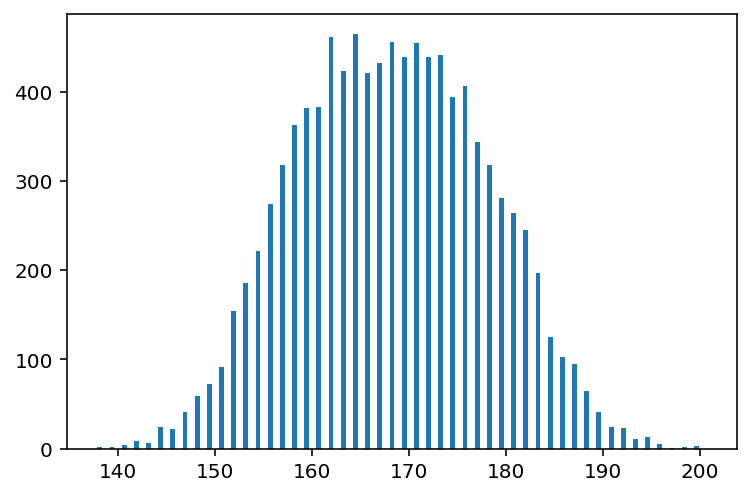

In [44]:
plt.hist(x, bins=50, width=0.5)
plt.show()

In [10]:
x.min(), x.max()

(137.82835864574665, 200.65680555982956)

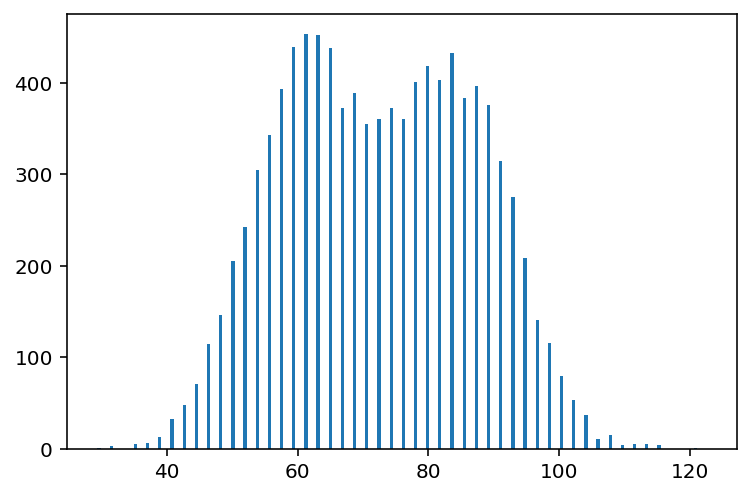

In [45]:
plt.hist(y, bins=50, width=0.5)
plt.show()

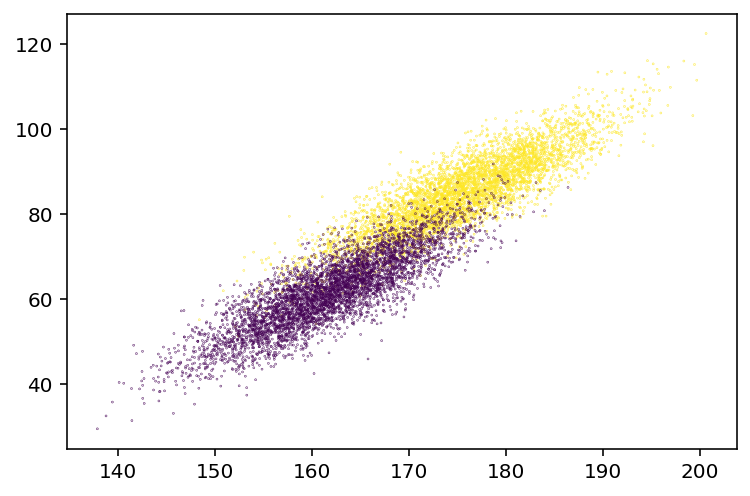

In [46]:
plt.scatter(x,y, s=0.05, c=df.Gender)

# 키로부터 몸무게 예측
- 성별 정보는 사용하지 않음. 즉, 남여를 구분하지 않는다

## 훈련 및 검증 데이터 나누기

- 주어진 샘플 데이터(X, y)를 훈련용과 검증용으로 랜덤하게 나누기 위해서 train_test_split 함수를 주로 사용한다
 - 샘플의 순서를 랜덤하게 섞어서 X_train, X_test 등으로 나눈다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

### train_test_split
- 훈련, 검증 데이터를 나누는 함수 train_test_split의 사용법을 배운다

In [47]:
from sklearn.model_selection import train_test_split
x = np.arange(10)
y = x*10

x, y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

In [48]:
# train_test_split는 인자로 주어진 데이터들을 랜덤하게 디폴트로 75%와 25% 비율로 나눈다
# 검증 데이터 비율을 변경할 수 있다
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

x_train, x_test

(array([1, 9, 7, 4, 2, 5]), array([0, 3, 6, 8]))

In [49]:
# 랜덤하게 shuffling되는 순서가 X, y데이터 행에 대해서 유지된다
y_train, y_test

(array([10, 90, 70, 40, 20, 50]), array([ 0, 30, 60, 80]))

## 키-몸무게 훈련 및 검증 데이터 나누기
- 키, 몸무게 전체 샘플 200개를 훈련용 150개, 검증용 50개로 나눈다

In [51]:
x_train, x_test, y_train, y_test = train_test_split(df.Height,df.Weight,random_state=19)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7500,), (2500,), (7500,), (2500,))

In [52]:
x_train[:3]

826     168.107636
4051    175.454146
8290    155.992858
Name: Height, dtype: float64

## 모델 생성, 학습, 사용 절차
- (1) 머신러닝에서 사용할 모델을 선택하고 생성한다
- (2) 훈련 데이터를 사용하여 모델을 학습시킨다 (최적의 파라미터를 구한다)
- (3) 검증 데이터를 사용하여 모델의 동작을 검증하고 성능을 평가한다
- (4) 모델 훈련이나 검증에 한번도 사용하지 않은 별도의(hold out) 테스트 데이터를 사용하여 모델 성능을 최종 평가한다

<img src ="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.02.11.png?raw=1" width=450 align='left'>

## 선형 회귀 모델

In [53]:
# 모델 생성, 학습, 사용 후 성능 보기 (R-Squared)
from sklearn.linear_model import LinearRegression
model = LinearRegression() # (1) 모델 생성
model.fit(x_train.values.reshape(-1,1), y_train) # (2) 학습
model.score(x_test.values.reshape(-1,1), y_test) # (3) 이용, 성능평가

0.863555438518547

In [54]:
# 학습한 계수(파라미터)
a, b = model.coef_, model.intercept_
a, b

(array([1.37717649]), -158.887341589521)

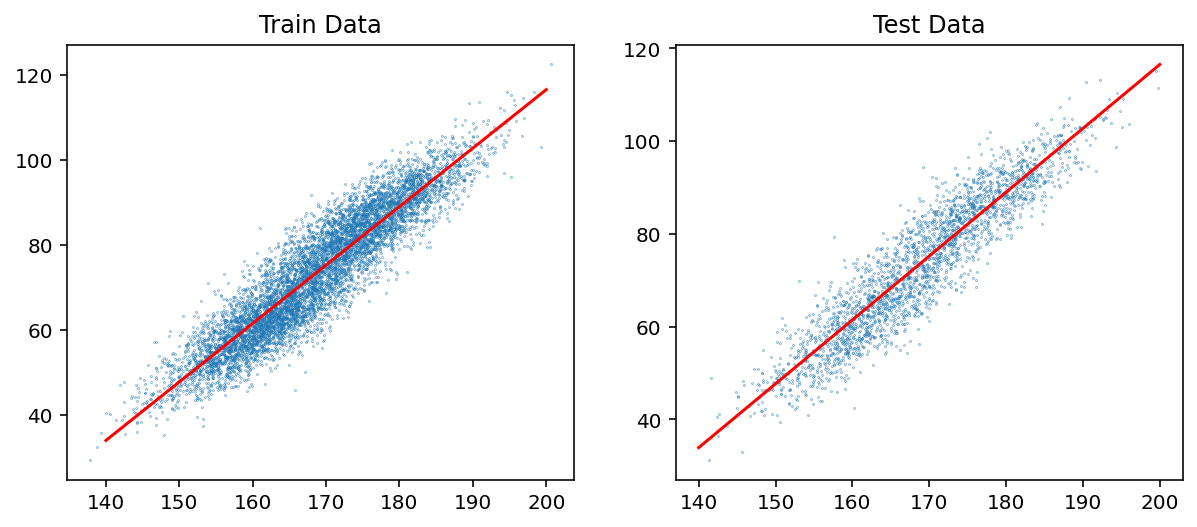

In [55]:
# 훈련과 검증 데이터에 대한 회귀 직선 보기
plt.figure(figsize=(10,4))
xs = np.linspace(140,200,2)
ys = a*xs + b

plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_train,y_train, s=0.05)

plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_test,y_test, s=0.05)

In [56]:
df_sc = df.copy()

In [57]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_sc[["Height", "Weight"]] = scale.fit_transform(df[["Height", "Weight"]])
df_sc

,Gender,Height,Weight
0,1,1.944061,2.505797
1,1,0.627537,0.027101
2,1,2.012443,1.597806
3,1,1.394060,1.825222
4,1,0.913421,1.398750
...,...,...,...
9995,0,-0.050660,-0.768151
9996,0,0.181839,0.293631
9997,0,-0.649688,-1.026730
9998,0,0.693125,0.075127


In [58]:
x_train, x_test, y_train, y_test = train_test_split(df_sc.Height,df_sc.Weight,random_state=19)
model.fit(x_train.values.reshape(-1,1), y_train) # (2) 학습
model.score(x_test.values.reshape(-1,1), y_test) # (3) 이용, 성능평가

0.8635554385185469

# 남여 구분 정보 사용

- 성별과 키, 두개의 컬럼을 입력으로 사용
- 남여의 키-몸무게 관계가 다르므로 추가 정보 사용으로 성능이 개선될 것으로 예상
- 입력이 2차원 배열 구조를 가지므로 reshape(-1,1)이 필요 없다

In [59]:
X = df[["Gender", "Height"]]
y = df.Weight.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)
model = LinearRegression() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9018876478426088

In [60]:
X[:3]

,Gender,Height
0,1,187.571423
1,1,174.706036
2,1,188.239668


In [ ]:
#현재 남여 0/1로 코딩했다, 1/0으로 바꾸면 결과가 달라지나요? 똑같습니다
#Get_dummies()사용하여 원핫인코딩하면 01, 10? 즉 컬럼이 3개가 됨, 성능이 어떻게 됨 타이타닉 참조

- 성별 정보를 추가로 사용하여 성능이 개선되었다

## 다중 회귀 모델
- 입력 변수가 2개인 다중회귀 모델이므로 파라미터가 변수의 수만큼 자동으로 2개 만들어진다
- $\hat{y} = b +a_{1}x_{1} + a_{2}x_{2}$
- $x_{1}$: 성별, $x_{2}$: 키

In [30]:
print(model.coef_)
print(model.intercept_)

[-8.72687301  1.0683633 ]
-102.4775928950605


In [31]:
a1, a2 = model.coef_[0], model.coef_[1]
b1 = model.intercept_

## 회귀직선
- (1)남성의 경우 회귀 직선 (Gender=0, 갈색 점): 파란색 선
- (2)여성의 경우 회귀 직선 (Gender=1, 노란색 점): 붉은색 선
- (3)성별을 구분하지 않는 전체 대상의 회귀직선: 검정색

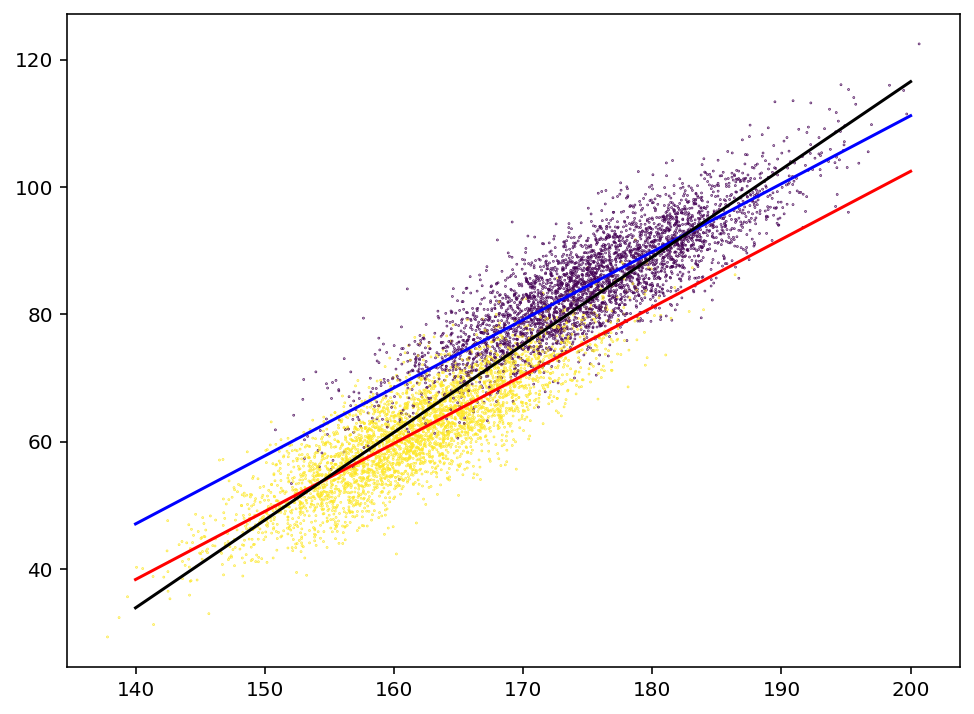

In [32]:
xs = np.linspace(140,200,2)
plt.figure(figsize=(8,6))
plt.scatter(X_train.Height, y_train, c=X_train.Gender, s=0.1)

# 남성의 경우 회귀 직선 (Gender=0)
ys = a1*0 + a2*xs + b1
plt.plot(xs, ys, c='b')

# 여성의 경우 회귀 직선 (Gender=1)
ys = a1*1 + a2*xs + b1
plt.plot(xs, ys, c='r')

# 남여 구분 없는 경우 회귀 직선 (a, b 파라미터 사용)
ys = a*xs + b
plt.plot(xs, ys, c='k')

## 회귀 성능 평가
- MAE, RMSE 값은 각각 mean_absolute_error, mean_squared_error 함수가 제공한다

In [ ]:
y_pred = model.predict(X_test)
error = y_pred-y_test

# MAE
print("MAE=", np.abs(error).mean())
from sklearn.metrics import mean_squared_error
print("RMSE=", mean_squared_error(y_test, y_pred, squared=False))

14.400387857113884

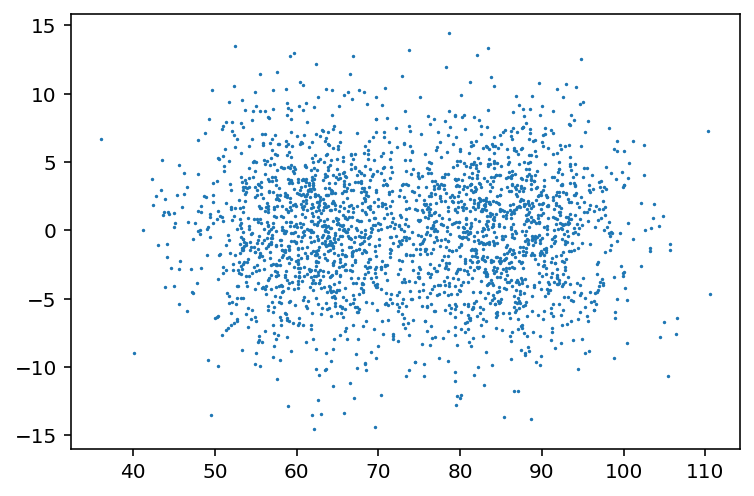

In [ ]:
plt.scatter(y_pred, error, s=0.5)

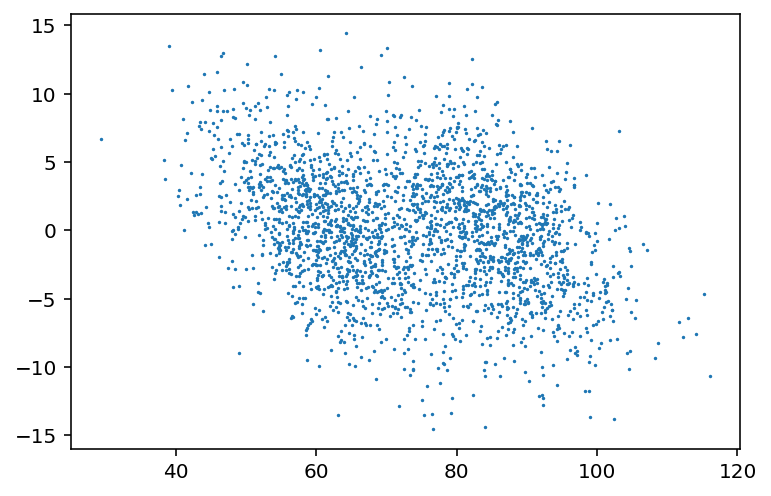

In [ ]:
plt.scatter(y_test, error, s=0.5)

# 회귀 모델 성능 평가
- 회귀 모델의 성능을 평가하는 척도로 기본적으로 R-Squared를 사용하며 MAE, RMSE 등을 참고로 본다
 - MAE: mean absolute error  
 - MSE: mean squared error    
 - RMSE: root MSE  

$MAE = $$1\over{N}$$ \sum |y_{i} - \hat{y}|$

$MSE = $$1\over{N}$$ \sum (y_{i} - \hat{y})^{2}$

$RMSE = \sqrt{MSE}$

$R^{2} = 1$-$\sum(y_{i}-\hat{y})^{2}\over{\sum(y_{i}-\bar{y})^{2}}$ $= 1$-$MSE\over{Variance}$  
 >  $y$ :  실제값, $\hat{y}$ :  예측치, $\bar{y}$ :  평균치
 
### R-Squared
- 회귀 성능의 기본적인 평가 지표
- MSE를 분산으로 정규화한 값을 사용한다
- R-sqaured 값은 1에 가까울수록 완벽한 예측을 수행한 것이고, 0 근처이면 오차 평균치가 표준편차 정도인 경우이다